<a href="https://colab.research.google.com/github/sachinomdubey/Projects/blob/main/Cell_counting/Rota_virus_count/Rota_virus_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow   
import imutils

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# All function definitions:

def view(img,caption):
  seperator = np.ones((img.shape[0],50))*255
  plt.figure(figsize=(14,7))
  # if(img.ndim == 2):
  #   temp = cv.hconcat([cellImg_gray,seperator])
  #   img = cv.hconcat([temp,img])
  # elif img.ndim == 3:
  #   img = cv.hconcat([cellImg_color, img])
  plt.imshow(img,cmap="gray")
  plt.title(caption)
  plt.show()

def readimg(imgname):
  global cellImg_color
  cellImg_color1 = cv.imread(imgname,cv.IMREAD_COLOR) 
  cellImg_color = cv.cvtColor(cellImg_color1, cv.COLOR_BGR2RGB)
  view(cellImg_color,"Original Image") 
  return cellImg_color

def color2gray(img):
  global cellImg_gray
  cellImg_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  view(cellImg_gray,"Grayscale Image") 
  return cellImg_gray

def Hist_eq(img):
  global HistEqimg
  HistEqimg = cv.equalizeHist(img)
  view(HistEqimg,"After Histogram equalization on grayscale image")
  return HistEqimg

def change_constrast(img,Contrast,Brightness):
  global inc_const
  inc_const = cv.convertScaleAbs(img, alpha=Contrast, beta=Brightness)
  view(inc_const, "After adjusting constrast")

def denoise_color(img,h,hcolor):
  global denoised;
  denoised = cv.fastNlMeansDenoisingColored(img,None,h,hcolor,7,21)
  view(denoised, "Denoised")


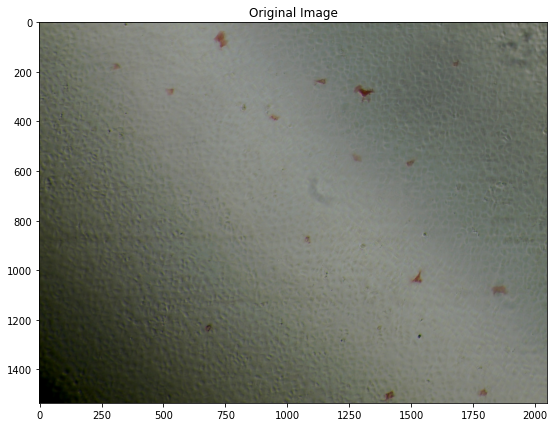

[[[112 117  95]
  [112 117  95]
  [111 116  96]
  ...
  [119 123 106]
  [121 125 108]
  [122 126 109]]

 [[114 119  97]
  [114 119  97]
  [114 119  99]
  ...
  [118 122 105]
  [120 124 107]
  [121 125 108]]

 [[116 121  98]
  [116 121  98]
  [115 120  98]
  ...
  [116 120 103]
  [118 122 105]
  [119 123 106]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [136 138 124]
  [135 137 123]
  [135 137 123]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [136 138 125]
  [136 138 125]
  [136 138 125]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [136 138 125]
  [136 138 125]
  [136 138 125]]]


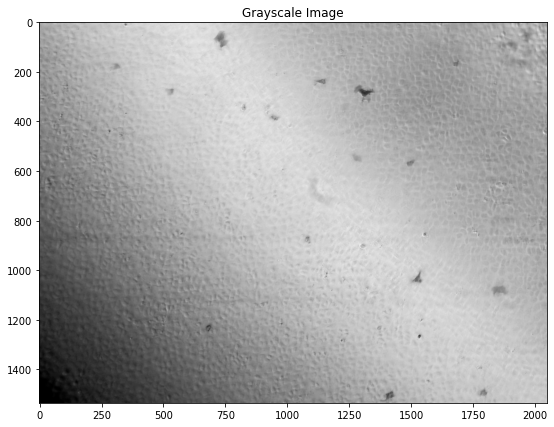

[[110 110 109 ... 117 119 120]
 [112 112 112 ... 116 118 119]
 [114 114 113 ... 114 116 117]
 ...
 [  0   0   0 ... 134 133 133]
 [  0   0   0 ... 134 134 134]
 [  0   0   0 ... 134 134 134]]


In [ ]:
cellImg_color = readimg("/content/drive/MyDrive/Work/Bharat Biotech Data/EVOS/QS_2565.jpg") #Reading the cell image (Color)
cellImg_gray = color2gray(cellImg_color)

In [ ]:
#Noise Filtering:
interact(denoise_color, 
         img=fixed(cellImg_color), 
         h=widgets.IntSlider(min=3, max=30, step=1, value=10),
         hcolor=widgets.IntSlider(min=3, max=30, step=1, value=10));


interactive(children=(IntSlider(value=10, description='h', max=30, min=3), IntSlider(value=10, description='hc…

In [ ]:
#Adjust Constrast and Brightness :
interact(change_constrast, img=fixed(denoised), Contrast=(1,3,0.01),Brightness=widgets.IntSlider(min=-50, max=50, step=1, value=0));

interactive(children=(FloatSlider(value=2.0, description='Contrast', max=3.0, min=1.0, step=0.01), IntSlider(v…

In [ ]:
def color_filter(img,h1,s1,v1,h2,s2,v2):
  global cfiltered
  hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
  # Threshold of blue in HSV space
  lower = np.array([h1, s1, v1])
  upper = np.array([h2, s2, v2])
  mask = cv.inRange(hsv, lower, upper)
  cfiltered = cv.bitwise_and(img, img, mask = mask)
  view(cfiltered,"filtered by color")

interact(color_filter, 
         img=fixed(inc_const), 
         h1=(0,255,1),s1=(0,255,1),v1=(0,255,1),
         h2=(0,255,1),s2=(0,255,1),v2=(0,255,1))

interactive(children=(IntSlider(value=127, description='h1', max=255), IntSlider(value=127, description='s1', …

<function __main__.color_filter>

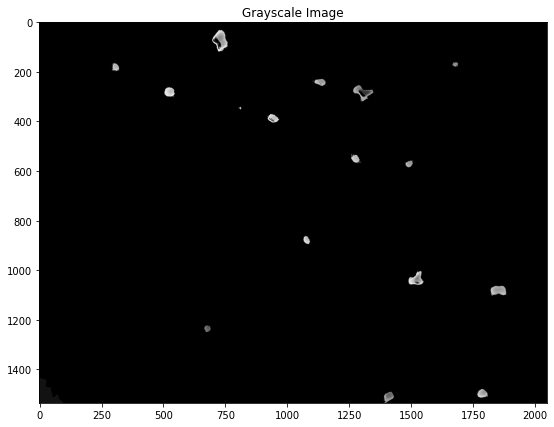

In [ ]:
cfiltered_gray = color2gray(cfiltered)

In [ ]:
#Manual Thresholding
def mthre(img,l,h):
  global image_thresh2
  image_thresh2 = np.ones(img.shape) * 0
  image_thresh2[img<l] = 255
  image_thresh2[img>h] = 255
  view(image_thresh2,"thresholded")

interact(mthre, img = fixed(cfiltered_gray),l=widgets.IntSlider(min=0, max=255, step=1, value=70),h=widgets.IntSlider(min=0, max=255, step=1, value=130));

interactive(children=(IntSlider(value=70, description='l', max=255), IntSlider(value=130, description='h', max…

In [ ]:
def morph(img,kernel_size):
  global opening
  kernel = np.ones((kernel_size,kernel_size),np.uint8)
  opening = cv.morphologyEx(img,cv.MORPH_OPEN,kernel) 
  view(opening,"Morphed")

interact(morph, img = fixed(image_thresh2),kernel_size=widgets.IntSlider(min=1, max=11, step=2, value=1));


interactive(children=(IntSlider(value=1, description='kernel_size', max=11, min=1, step=2), Output()), _dom_cl…

In [ ]:
def dilateImg(kernel_size):
  global dilated
  kernel = np.ones((kernel_size,kernel_size),np.uint8)
  dilated = cv.dilate(opening,kernel) 
  view(dilated,"dilated")

interact(dilateImg,img = fixed(opening), kernel_size=widgets.IntSlider(min=1, max=21, step=2, value=11));


interactive(children=(IntSlider(value=11, description='kernel_size', max=21, min=1, step=2), Output()), _dom_c…

In [ ]:
dilated = np.uint8(dilated)

cnts = cv.findContours(dilated.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))

15


In [ ]:
def canny(th1,th2):
  global edges 
  edges = cv.Canny(image=image_blur, threshold1=th1, threshold2=th2) 
  view(edges,"Edge detected")

interact(canny, th1=widgets.IntSlider(min=0, max=255, step=1, value=70),th2=widgets.IntSlider(min=0, max=255, step=1, value=130));

interactive(children=(IntSlider(value=70, description='th1', max=255), IntSlider(value=130, description='th2',…

In [ ]:
#Thresholding
def img_threshold(img,threshold):
  global image_thresh
  image_res ,image_thresh = cv.threshold(img,threshold,255,cv.THRESH_BINARY_INV)
  print(image_thresh.shape)
  view(image_thresh,"thresholded")

interact(img_threshold, img=fixed(cfiltered),threshold=widgets.IntSlider(min=0, max=255, step=1, value=190));

interactive(children=(IntSlider(value=190, description='threshold', max=255), Output()), _dom_classes=('widget…

In [ ]:
#Median blur
def median_blur(blur_intensity):
  global image_blur 
  image_blur = cv.medianBlur(inc_const,blur_intensity)
  view(image_blur,"median blur image")

interact(median_blur, blur_intensity=widgets.IntSlider(min=1, max=25, step=2, value=3));




interactive(children=(IntSlider(value=3, description='blur_intensity', max=25, min=1, step=2), Output()), _dom…

interactive(children=(IntSlider(value=70, description='l', max=255), IntSlider(value=130, description='h', max…

In [ ]:
def erodeImg(kernel_size):
  global eroded
  kernel = np.ones((kernel_size,kernel_size),np.uint8)
  eroded = cv.erode(opening,kernel) 
  view(eroded,"Erroded")

interact(erodeImg, kernel_size=widgets.IntSlider(min=1, max=21, step=2, value=11));


interactive(children=(IntSlider(value=11, description='kernel_size', max=21, min=1, step=2), Output()), _dom_c…

In [ ]:
def dis_tansform(distance,factor):
  global last_image
  dist_transform = cv.distanceTransform(eroded,cv.DIST_L2,distance)
  ret, last_image =  cv.threshold(dist_transform, factor*dist_transform.max(),255,0)
  last_image = np.uint8(last_image)
  view(last_image)

interact(dis_tansform, distance=widgets.IntSlider(min=3, max=5, step=2, value=5),factor=(0.1,0.7,0.01))

interactive(children=(IntSlider(value=5, description='distance', max=5, min=3, step=2), FloatSlider(value=0.4,…

<function __main__.dis_tansform>

In [ ]:
print(len(cnts))

165


In [ ]:
def display(img,count,cmap="gray"):
    f_image = cv.imread("coins.jpg")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Money Count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv.minEnclosingCircle(c)
	cv.putText(image, "#{}".format(i + 1), (int(x) - 45, int(y)+20),cv.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
	cv.drawContours(image, [c], -1, (0, 255, 0), 2)

display(image,len(cnts))

NameError: ignored

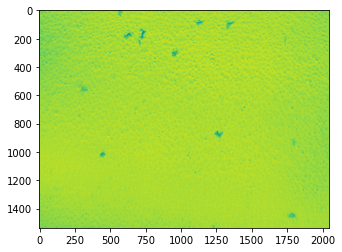

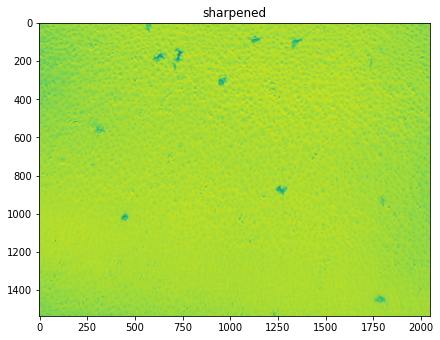

In [ ]:
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Applying cv.filter2D function on our Logo image
sharpen_img_2=cv.filter2D(cellImg_gray,-1,filter)
plt.imshow(sharpen_img_2)
view(sharpen_img_2,"sharpened")

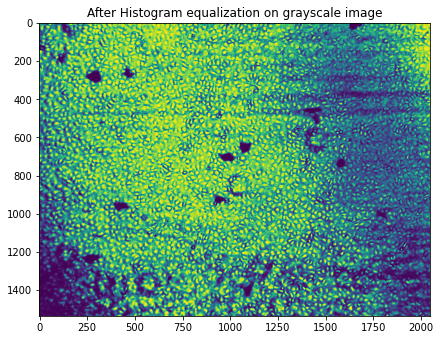

In [ ]:
HistEqimg = Hist_eq(cellImg_gray) #Histogram equalization